# SVM
https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors

# svc = svm.SVC(kernel='linear', C=1, gamma=0).fit(X, y)
svc = svm.SVC(kernel='linear', C=1).fit(X, y)

In [4]:
def plot_mesh(svc):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title('SVC with linear kernel')
    plt.show()

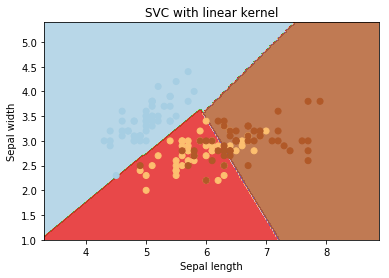

In [5]:
plot_mesh(svc)

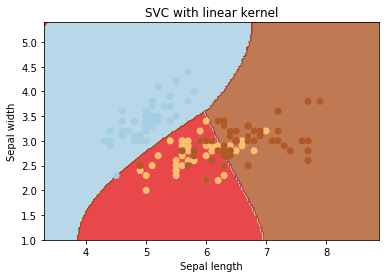

In [6]:
svc = svm.SVC(kernel='rbf', C=1).fit(X, y)
plot_mesh(svc)

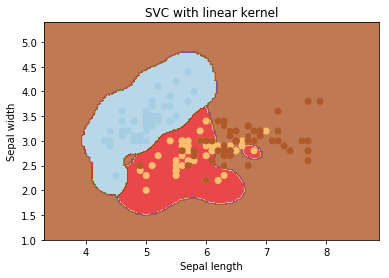

In [7]:
svc = svm.SVC(kernel='rbf', C=1, gamma=10).fit(X, y)
plot_mesh(svc)

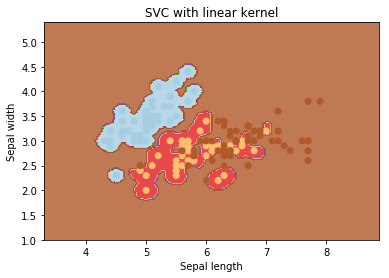

In [8]:
svc = svm.SVC(kernel='rbf', C=1, gamma=100).fit(X, y)
plot_mesh(svc)